In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Logistic Regression

We have studied how to use linear regression and polynomial regression to *predict a target numeric value*. There is another learning task, **classification**, aiming at predicting group membership rather than numeric values. Email spam filter is a good example: it is trained with many example emails with their class (spam or non-spam), and it must learn how to classify new emails.

Linear regression is **not** a good choice for classification tasks. We will introduce the **logistic regression** model and use the iris dataset to illustrate how the model works.

### Logistic Regression
**Single-class model**: fit the probability of data belonging to the class

$\log\frac{\hat{p}}{1 - \hat{p}} = h(x_1, ..., x_n),$

$h(x_1, ..., x_n) = \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n.$
- n: number of input features.
- x_1, ..., x_n: input features
- $\hat{p}$: the estimated probability of data belonging to the class
- $\theta_1,...,\theta_n$: parameters of the model

**Alternative format**:

$\hat{p} = \sigma(\textbf{x}\cdot\theta^T).$

- $\textbf{x} = (x_1, ..., x_n)$.
- $\theta = (\theta_1, ..., \theta_n)$.
- $\sigma(t) = \frac{1}{1+e^{-t}}$: logistic function

**Decision rule** (adjustible):

- prediction = 1 if $\hat{p}$ $\ge$ 0.5
- prediction = 0 if $\hat{p}$ < 0.5

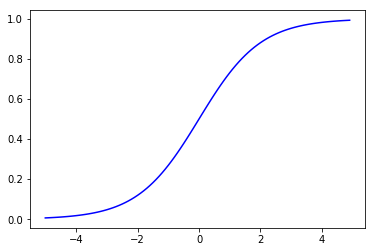

In [3]:
# The graph of the logistic function
# generate a list of x coordinates
list_x = np.arange(-5, 5, 0.1)
# calculate the corresponding y coordinates
list_y = 1 / (1 + np.exp(-list_x))
# plot x against y
plt.plot(list_x, list_y, 'b-')
plt.show()

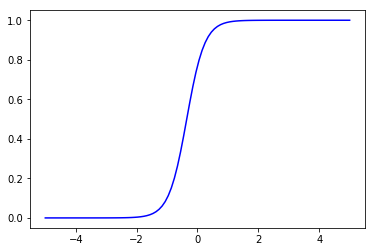

In [4]:
# t = theta0 + theta1 * x
# theta0 = 1.2, theta1 = 3.4
# plot the curve showing x vs. the probability

x = np.linspace(-5, 5, 100)
t = 1.2 + 3.4 * x
probs = 1 / (1 + np.exp(-t))
plt.plot(x, probs, 'b-')

## Logistic Regression Example: The Iris Dataset

**Iris dataset** is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. [wiki page](https://en.wikipedia.org/wiki/Iris_flower_data_set)

- Import dataset using <code>sklearn.dataset.load_iris()</code>
- Explore the dataset: data description, feature names, data types, data histograms, scatter plots.
- Split the dataset into train_set and test_set
- Apply <code>sklearn.linear_model.LogisticRegression</code> to build a binary classifier on **Iris-Virginica**.
- Evaluate the performance of the model: Accuracy, cross-validation, precision vs. recall, confusion matrix...
- Visualize the model (show decision boundary)


In [5]:
# Load dataset
from sklearn import datasets
iris = datasets.load_iris()

iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
# Explore the dataset
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [7]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
# Convert the data into a data frame
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# Add the target class
# print(iris['target'])
iris_df['target'] = iris['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [12]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
# Unbalanced data
df = pd.DataFrame()
# df['Income'] = np.array([[10000],
#                          [80000],
#                          [1000000000]])
# df['age'] = np.array([
#     [35],
#     [40],
#     [45]
# ])
df['Age'] = [35, 40, 55]
df['Income'] = [10000, 80000, 10000000]
df['Income Scaled'] = df['Income'] / 10000
df.head()

,Age,Income,Income Scaled
0,35,10000,1.0
1,40,80000,8.0
2,55,10000000,1000.0


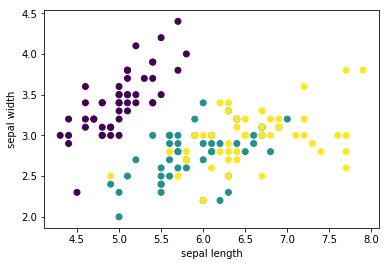

In [14]:
# Draw scatter plots.
# scatter plot: sepal length vs. sepal width
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['target'])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

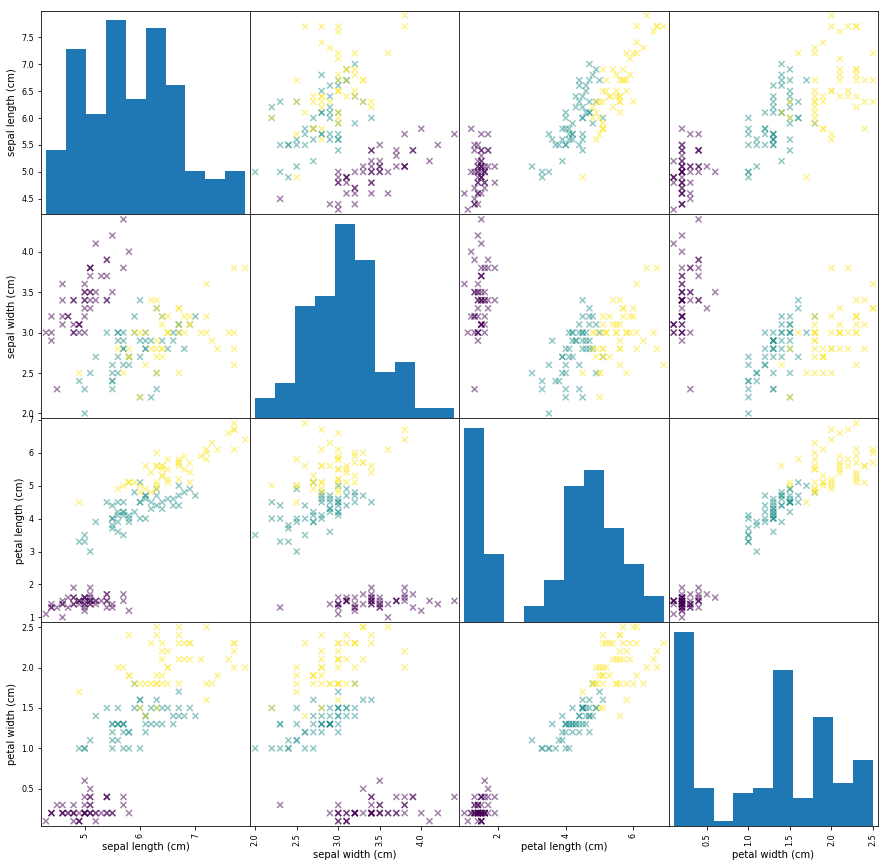

In [15]:
# Draw all scatter plots
from pandas.plotting import scatter_matrix
scatter_matrix(iris_df.iloc[:, :4], figsize=(15, 15), marker='x',
               c=iris_df['target'])
plt.show()

In [16]:
# Train-test split
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(iris_df, test_size=0.15)
print(training_set.shape)
print(test_set.shape)

(127, 5)
(23, 5)


In [17]:
training_set['target'].value_counts()

2    43
1    43
0    41
Name: target, dtype: int64

In [18]:
# Apply logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(training_set.iloc[:, :4],
          training_set.iloc[:, 4])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
# Model evaluation
# 1. look at the prediction accuracy on test set
test_predictions = model.predict(test_set.iloc[:, :4])
from sklearn.metrics import accuracy_score
print("test accuracy: ", accuracy_score(test_set['target'], test_predictions))

test accuracy:  0.9130434782608695


In [20]:
# 2. cross validation
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, training_set.iloc[:, :4], training_set.iloc[:, 4],
                      cv=3))

[0.88636364 0.95238095 1.        ]


[[9 0 0]
 [0 5 2]
 [0 0 7]]


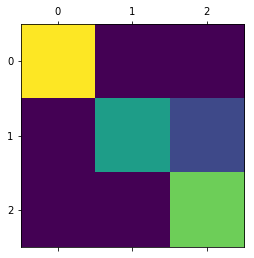

In [21]:
# 3. confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_set['target'], test_predictions)
plt.matshow(matrix)
print(matrix)

In [22]:
# precision - recall - f1 score
# roc curve

In [23]:
# Model visualization
# Consider a simpler model: only use the first column to classify flowers
# Consider a binary task: only try to recognize virginica (target = 2)
X = iris_df.iloc[:, [0]]
Y = iris_df['target']
Y = (Y == 2)
model2 = LogisticRegression()
model2.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
Y_pred = model2.predict(X)
Y_pred_prob = model2.predict_proba(X)


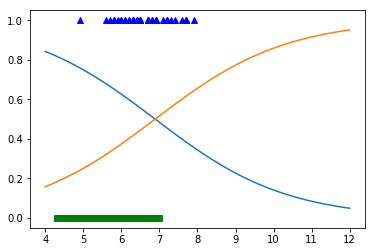

In [25]:
# plot the probability vs. input value
list_x = np.linspace(4, 12, 100).reshape([-1, 1])
list_y = model2.predict_proba(list_x)
# print(X[Y==0])
X0 = X[Y==0]
X1 = X[Y==1]
plt.plot(X0, np.zeros(X0.shape), 'gs')
plt.plot(X1, np.ones(X1.shape), 'b^')
plt.plot(list_x, list_y)

In [26]:
# Train a classification model with petal length and petal width
X = iris_df.iloc[:, [2, 3]]
y = (iris_df['target'] == 2)
print("X shape:", X.shape)
print("y shape:", y.shape)

model2 = LogisticRegression(C=10**10, random_state=42)
model2.fit(X, y)

X shape: (150, 2)
y shape: (150,)


LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

(500, 500) (500, 500)


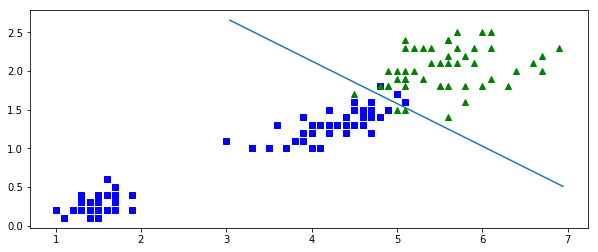

In [27]:
# 2-dimensional decision boundary
x0, x1 = np.meshgrid(np.linspace(0, 7, 500),
                     np.linspace(0, 2.7, 500))
print(x0.shape, x1.shape)

X_new = np.hstack([x0.reshape([-1, 1]), x1.reshape([-1, 1])])
y_new_prob = model2.predict_proba(X_new)
y_plot = y_new_prob[:, 1].reshape(x0.shape)
# How many values falls between 0.49 and 0.51?
X_boundary = X_new[np.where((y_new_prob[:, 1] > 0.499) & 
                            (y_new_prob[:, 1] < 0.501))]
X_boundary.shape

plt.figure(figsize=(10, 4))
plt.plot(X[y==0].iloc[:, 0],
         X[y==0].iloc[:, 1],
         'bs',
         label='Not Iris-Virginica')
plt.plot(X[y==1].iloc[:, 0],
         X[y==1].iloc[:, 1],
         'g^',
         label='Iris-Virginica')
plt.plot(X_boundary[:, 0], X_boundary[:, 1])
plt.show()

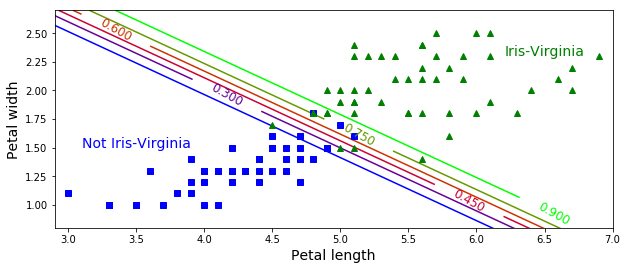

In [28]:
# A more refined figure
plt.figure(figsize=(10, 4))
plt.plot(X[y==0].iloc[:, 0],
         X[y==0].iloc[:, 1],
         'bs',
         label='Not Iris-Virginica')
plt.plot(X[y==1].iloc[:, 0],
         X[y==1].iloc[:, 1],
         'g^',
         label='Iris-Virginica')

contour = plt.contour(x0, x1, y_plot, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(model2.coef_[0][0] * left_right + model2.intercept_
             / model2.coef_[0][1])

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, 'k--', linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginia", fontsize=14, color="b",
         ha="center")
plt.text(6.5, 2.3, "Iris-Virginia", fontsize=14, color="g",
         ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## Logistic Function $\sigma(t) = \frac{1}{1+e^{-t}}$

1. What is the range of the logistic function?

2. What can we say about the value of $h(x_1, ..., x_n) (=\theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n)$ if $\hat{p}\ge 0.5$?

3. What can we say about the value of $h(x_1, ..., x_n) (=\theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n)$ if $\hat{p}< 0.5$?

In [ ]:
# Plot the graph of logistic function over interval [-10, 10]


## Model Training

**Cost (loss) function** for logistic regression:

\begin{equation}
c(\theta) = \left\{
\begin{array}{cc}
-\log(\hat{p}) & \textit{if }y=1,\\
-\log(1-\hat{p}) & \textit{if }y=0.
\end{array}
\right.
\end{equation}

The cost function $c(\theta)$:

- small if $y=1$ (data example belongs to the class) and $\hat{p}$ is close to 1.
- small if $y=0$ (data example does not belong to the class) and $\hat{p}$ is close to 0.
- is a convex function no matter what $y$ is.

**Uniformed expression for the cost function**:

$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}\big[y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})\big]$

- $c(\theta) = J(\theta)$ for $y=0$ and $y=1$.
- There is no equivalent of the Normal Equation.
- $J(\theta)$ is a convex function.
- $\frac{\partial J}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m}\big(\sigma(\textbf{x}^{(i)}\cdot\theta^T) - y^{(i)}\big)x_j^{(i)}$.

**Question**: Why not use the mean-square-error (SME) cost function?

## Logistic Regression for Multiple Classes (Softmax regression)
**model**:

$\hat{p}_k = \frac{\exp(s_k(\textbf{x}))}{\sum_{i=1}^K\exp(s_i(\textbf{x}))}$.

$s_k(\textbf{x}) = \textbf{x}\cdot\theta_k^T$

- $\hat{p}_k$ is the probability that the instance belongs to class $k$.
- K is the number of classes.
- $\theta_k$ is the coefficient vector associated with class $k$. All these vectors are stored as rows in a parameter matrix $\Theta$.
- The softmax classifier predicts the class with the highest estimated probability (which is simply the class with the highest score).

**Cross entropy cost function**

$J(\Theta) = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K
y_k^{(i)}\log(\hat{p}_k^{(i)})$

- $y_k^{(i)}$ is equal to 1 if the target for the i-th instance is $k$; otherwise, it is equal to 0.


## Homework:

1. Build a logistic classifier to identify Iris-Setosa based only on its petal width. Divide the dataset randomly into 80% training set and 20% test set, show accuracy on test set.
2. Visualize the model by showing the probability of Iris-Setosa increases as petal width increases.
3. (optional) Recreate the decision boundary graph Figure 4-24 from the textbook.